In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 122)
pd.set_option('display.max_rows', 150)

In [3]:
df = pd.read_csv(r'C:\Users\surya\Desktop\Jupyter Python Programs\Mini Project - Data Mining\clean_credit_card_fraud_detection.csv')
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_13,FLAG_DOCUMENT_16,AMT_REQ_CREDIT_BUREAU_YEAR,STD_OF_LIVING_AVG,STD_OF_LIVING_MEDIAN,STD_OF_LIVING_MODE
0,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,1.000000,1.00,0.2,0.01003,-19046,-225.0,-4260.0,-2531,26.00,1,1,1,0.470588,2,2,9,0,0,0,0.192982,0.4040,0.5560,0.7295,0.0,0.0,-815.0,0,0,0,0,0.0,0.212803,0.188466,0.252777
1,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,1.000000,1.00,0.2,0.00802,-19005,-3039.0,-9830.0,-2437,23.75,1,0,0,0.470588,2,2,17,0,0,0,0.087719,0.4968,0.6504,0.6934,0.0,0.0,-617.0,1,0,0,0,0.0,0.212803,0.188466,0.252777
2,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,1.000000,1.00,0.2,0.02866,-19932,-3038.0,-4310.0,-3458,21.50,1,0,0,0.176471,2,2,11,0,1,1,0.649123,0.5894,0.3228,0.6570,0.0,0.0,-1106.0,0,0,0,0,0.0,0.212803,0.188466,0.252777
3,0,0,1,0,1,0,99000.0,490495.5,27517.5,454500.0,0.571429,1.00,0.2,0.03580,-16941,-1588.0,-4970.0,-477,19.25,1,1,1,0.470588,2,2,16,0,0,0,0.578947,0.6820,0.3542,0.6210,0.0,0.0,-2536.0,1,0,0,0,1.0,0.212803,0.188466,0.252777
4,0,0,0,1,1,1,171000.0,1560726.0,41301.0,1395000.0,0.142857,0.25,0.2,0.03580,-13778,-3130.0,-1213.0,-619,17.00,1,0,1,0.000000,2,2,16,0,0,0,0.087719,0.7750,0.7240,0.4920,0.0,0.0,-1562.0,0,0,0,0,2.0,0.212803,0.188466,0.252777


### Data preprocessing

In [4]:
X = df.iloc[:, 1:].values  
y = df.iloc[:, 0].values

In [5]:
# Another way
# X = df.drop(['TARGET'],axis = 1)
# y = df['TARGET']

In [6]:
X

array([[1.        , 1.        , 1.        , ..., 0.21280281, 0.1884658 ,
        0.25277656],
       [0.        , 0.        , 0.        , ..., 0.21280281, 0.1884658 ,
        0.25277656],
       [0.        , 1.        , 0.        , ..., 0.21280281, 0.1884658 ,
        0.25277656],
       ...,
       [0.        , 0.        , 0.        , ..., 0.25654602, 0.25689752,
        0.30028144],
       [0.        , 0.        , 0.        , ..., 0.17906419, 0.16410542,
        0.15383905],
       [0.        , 0.        , 0.        , ..., 0.20686652, 0.20209612,
        0.18315538]])

In [7]:
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### Splitting into Training and Testing Data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
X_train.shape

(246007, 43)

In [11]:
X_test.shape

(61502, 43)

### Logistic Regression Model

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [13]:
model = LogisticRegression(max_iter=5000)

In [14]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [15]:
model.score(X_train, y_train)

0.9192705898612641

In [16]:
model.score(X_test, y_test)

0.9192546583850931

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

-0.08803769407234885

In [20]:
model.predict_proba(X_test)

array([[0.8721745 , 0.1278255 ],
       [0.84892368, 0.15107632],
       [0.95172886, 0.04827114],
       ...,
       [0.94381452, 0.05618548],
       [0.75778927, 0.24221073],
       [0.87771439, 0.12228561]])

### Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[56536,     1],
       [ 4965,     0]], dtype=int64)

Text(69.0, 0.5, 'Truth')

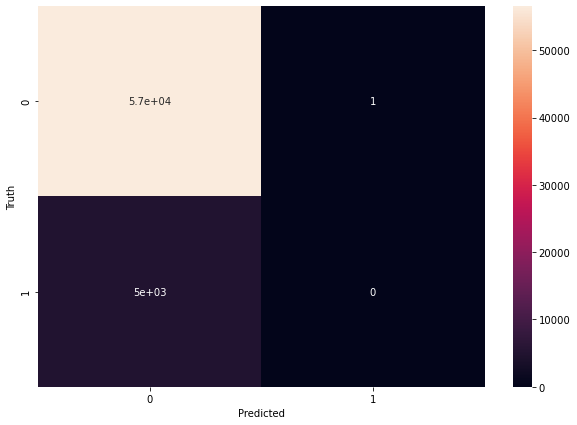

In [22]:
# Visualizing the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Test Cases for output y=1

In [34]:
test_case = [1.00000000e+00,  1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  3.06000000e+05,  1.35000000e+06,  6.75000000e+04,
        2.47500000e+05,  1.00000000e+00,  2.50000000e-01,  2.00000000e-01,
        7.33000000e-03, -1.31970000e+04, -2.06200000e+03, -6.19000000e+02,
       -4.03800000e+03,  4.33200000e+00,  1.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  5.88235294e-01,  2.00000000e+00,  2.00000000e+00,
        1.70000000e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.77192982e-02,  3.47000000e-01,  6.97800000e-01,  3.99700000e-01,
        0.00000000e+00,  0.00000000e+00, -3.06000000e+02,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.10553414e-01,  3.11632429e-01,  3.21619478e-01]

In [35]:
model.predict([test_case])

array([1], dtype=int64)

In [36]:
test_case1 = [1.00000000e+00,  1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  4.06000000e+05,  4.35000000e+06,  4.75000000e+04,
        4.47500000e+05,  1.00000000e+00,  4.50000000e-01,  4.00000000e-01,
        4.33000000e-03, -1.31970000e+04, -4.06200000e+03, -4.19000000e+02,
       -4.03800000e+03,  4.33200000e+00,  1.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  4.88235294e-01,  2.00000000e+00,  4.00000000e+00,
        1.70000000e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.77192982e-02,  4.47000000e-01,  4.97800000e-01,  4.99700000e-01,
        0.00000000e+00,  0.00000000e+00, -4.06000000e+02,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.10553414e-01,  4.11632429e-01,  4.21619478e-01]

In [37]:
model.predict([test_case1])

array([1], dtype=int64)